In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import warnings
warnings.filterwarnings("ignore")

2025-11-22 22:07:35.071207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763849255.319677      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763849255.381247      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
train = keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/teeth-dataclassfication/Teeth DataSet/Teeth_Dataset/Training',
    labels = 'inferred',
    label_mode = 'int',
    image_size=(224, 224),   
    batch_size=32,           
    shuffle=True,            
    seed=42
)

Found 3087 files belonging to 7 classes.


I0000 00:00:1763849276.302431      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1763849276.303116      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [3]:
val = keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/teeth-dataclassfication/Teeth DataSet/Teeth_Dataset/Validation',
    labels = 'inferred',
    label_mode = 'int',
    image_size=(224, 224),   
    batch_size=32,           
    shuffle=True,            
    seed=42
)

Found 1028 files belonging to 7 classes.


In [4]:
test = keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/teeth-dataclassfication/Teeth DataSet/Teeth_Dataset/Testing',
    labels = 'inferred',
    label_mode = 'int',
    image_size=(224, 224),   
    batch_size=32,           
    shuffle=True,            
    seed=42
)

Found 1028 files belonging to 7 classes.


In [5]:
def normalize(img,label):
    return tf.cast(img,tf.float64)/255.0 , label 

In [6]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train = train.map(normalize,num_parallel_calls=AUTOTUNE)
train = train.cache().prefetch(AUTOTUNE)

In [7]:
val = val.map(normalize,num_parallel_calls=AUTOTUNE)
val = val.cache().prefetch(AUTOTUNE)

In [8]:
test = test.map(normalize,num_parallel_calls=AUTOTUNE)
test = test.cache().prefetch(AUTOTUNE)

In [9]:
# model = keras.Sequential([
#     Input(shape = (224,224,3)),
#     Conv2D(32,5,padding = 'same',activation = 'relu',kernel_initializer = 'he_normal'),
#     Conv2D(32,5,padding = 'same',activation = 'relu',kernel_initializer = 'he_normal'),
#     MaxPooling2D(),
#     Conv2D(64,5,padding = 'same',activation = 'relu',kernel_initializer = 'he_normal'),
#     Conv2D(64,5,padding = 'same',activation = 'relu',kernel_initializer = 'he_normal'),
#     MaxPooling2D(),
#     Conv2D(128,5,padding = 'same',activation = 'relu',kernel_initializer = 'he_normal'),
#     Conv2D(128,5,padding = 'same',activation = 'relu',kernel_initializer = 'he_normal'),
#     MaxPooling2D(),
#     Flatten(),
#     Dense(256,activation = 'gelu',kernel_initializer = 'he_normal'),
#     Dense(256,activation = 'gelu',kernel_initializer = 'he_normal'),
#     Dense(128,activation = 'gelu',kernel_initializer = 'he_normal'),
#     Dense(128,activation = 'gelu',kernel_initializer = 'he_normal'),
#     Dense(10,activation = 'softmax',kernel_initializer = 'he_normal'),
# ])

In [10]:
# train_augmentation = keras.preprocessing.image.ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     zoom_range=0.2,
#     fill_mode='nearest'
# )

In [11]:
# model.summary()

In [12]:
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

with strategy.scope():
  model = keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
    Conv2D(32,5,padding = 'same',activation = 'relu',kernel_initializer = 'he_normal'),
    Conv2D(32,3,padding = 'same',activation = 'relu',kernel_initializer = 'he_normal'),
    MaxPooling2D(),
    Conv2D(64,3,padding = 'same',activation = 'relu',kernel_initializer = 'he_normal'),
    Conv2D(64,3,padding = 'same',activation = 'relu',kernel_initializer = 'he_normal'),
    MaxPooling2D(),
    Conv2D(128,3,padding = 'same',activation = 'relu',kernel_initializer = 'he_normal'),
    Conv2D(128,3,padding = 'same',activation = 'relu',kernel_initializer = 'he_normal'),
    MaxPooling2D(),
    Conv2D(256,3,padding = 'same',activation = 'relu',kernel_initializer = 'he_normal'),
    Conv2D(256,3,padding = 'same',activation = 'relu',kernel_initializer = 'he_normal'),
    MaxPooling2D(),
    Flatten(),
      Dropout(0.3),
    Dense(256,activation = 'gelu',kernel_initializer = 'he_normal'),
      
    Dense(256,activation = 'gelu',kernel_initializer = 'he_normal'),
      Dropout(0.3),
    Dense(128,activation = 'gelu',kernel_initializer = 'he_normal'),
    Dense(128,activation = 'gelu',kernel_initializer = 'he_normal'),
      Dropout(0.3),
    Dense(7,activation = 'softmax',kernel_initializer = 'he_normal'),
])
  model.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = keras.optimizers.Adam(),
              metrics = ['accuracy'])




INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')
Number of devices: 2


In [13]:
callback = keras.callbacks.ModelCheckpoint(
    '/kaggle/working/model_best.keras',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max'  
)


In [14]:
history = model.fit(train,epochs=40, validation_data=val,callbacks = [callback])

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
Epoch 1/40
INFO:tensorflow:Collective all_reduce tensors: 1 all_reduces, num_devices = 2, group_size = 2, implementation = CommunicationImplementation.NCCL, num_packs = 1
INFO:tensorflow:Collective all_reduce tensors: 1 all_reduces, num_devices = 2, group_size = 2, implementation = CommunicationImplementation.NCCL, num_packs = 1
INFO:tensorflow:Collective all_reduce tensors: 26 all_reduces, num_devices = 2, group_size = 2, implementation = CommunicationImplementation.NCCL, num_packs = 1
INFO:tensorflow:Collective all_reduce tensors: 1 all_reduces, num_devices = 2, group_size = 2, implementation = CommunicationImplementation.NCCL, num_packs = 1
INFO:tensorflow:Collective all_reduce tensors: 1 all_reduces, num_de

I0000 00:00:1763849287.965762      68 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1763849288.590250      67 cuda_dnn.cc:529] Loaded cuDNN version 90300


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.0579 - loss: 3.7762INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Collective all_reduce tensors: 1 all_reduces, num_devices = 2, group_size = 2, implementation = CommunicationImplementation.NCCL, num_packs = 1
INFO:tensorflow:Collective all_reduce tensors: 1 all_reduces, num_devices = 2, group_size = 2, implementation = CommunicationImplementation.NCCL, num_packs = 1
INFO:tensorflow:Collective all_reduce tensors: 1 all_reduces, num_devices = 2, group_size = 2, implementation = CommunicationImplementation.NCCL, num_packs = 1
INFO:tensorflow:Collective all_reduce tensors: 1 all_reduces, num_devices = 2, group_size = 2, implementation = CommunicationImplementation.NCCL, num_packs = 1
97/97 

In [15]:
model.evaluate(test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9118 - loss: 0.2914


[0.28823423385620117, 0.91323322057724]

<Axes: >

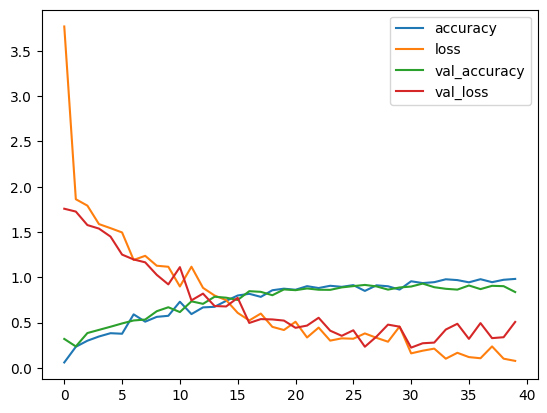

In [16]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [17]:
base_model = keras.applications.EfficientNetV2L(include_top = False)

473176280/473176280 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [18]:
base_model.trainable =False
for layer in base_model.layers[600:]:
    layer.trainable = True

In [19]:
model2 = keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256,activation = 'gelu',kernel_initializer = 'he_normal'),
    Dense(7,activation = 'softmax',kernel_initializer = 'he_normal'),
])

In [20]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-l (Functional)   │ (None, None, None,     │   117,746,848 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,076,583 (450.43 MB)

 Trainable params: 89,656,423 (342.01 MB)

 Non-trainable params: 28,420,160 (108.41 MB)

In [21]:
model2.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
               optimizer = keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [22]:
history2 = model2.fit(train,epochs = 5,validation_data = val)

Epoch 1/5


I0000 00:00:1763849950.276584      67 service.cc:148] XLA service 0x2bfed350 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763849950.279501      67 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1763849950.279521      67 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1763850029.597360      67 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


97/97 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 0.1975 - loss: 1.9142 - val_accuracy: 0.2247 - val_loss: 1.9592
Epoch 2/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 74s 763ms/step - accuracy: 0.2731 - loss: 1.8029 - val_accuracy: 0.2938 - val_loss: 1.8535
Epoch 3/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 74s 763ms/step - accuracy: 0.3278 - loss: 1.7076 - val_accuracy: 0.3930 - val_loss: 1.6156
Epoch 4/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 74s 763ms/step - accuracy: 0.3462 - loss: 1.6560 - val_accuracy: 0.4222 - val_loss: 1.5519
Epoch 5/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 74s 760ms/step - accuracy: 0.3759 - loss: 1.6124 - val_accuracy: 0.4270 - val_loss: 1.5150


In [23]:
base_model2 = tf.keras.applications.InceptionResNetV2(
    input_shape=(224, 224,3),
    include_top=False,
    weights="imagenet"
)

base_model2.trainable = True

for layer in base_model2.layers[:600]:
    layer.trainable = False
    
model3 = tf.keras.Sequential([
    base_model2,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(7, activation="softmax")
])

model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [24]:
history3 = model3.fit(train, validation_data=val, epochs=8)


Epoch 1/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 122s 678ms/step - accuracy: 0.6458 - loss: 1.0814 - val_accuracy: 0.3288 - val_loss: 12.2240
Epoch 2/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 27s 284ms/step - accuracy: 0.9663 - loss: 0.1301 - val_accuracy: 0.6663 - val_loss: 3.6812
Epoch 3/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 27s 275ms/step - accuracy: 0.9892 - loss: 0.0448 - val_accuracy: 0.9543 - val_loss: 0.1237
Epoch 4/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 26s 266ms/step - accuracy: 0.9931 - loss: 0.0242 - val_accuracy: 0.9095 - val_loss: 0.2717
Epoch 5/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 26s 272ms/step - accuracy: 0.9890 - loss: 0.0401 - val_accuracy: 0.7150 - val_loss: 1.5039
Epoch 6/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 26s 273ms/step - accuracy: 0.9847 - loss: 0.0511 - val_accuracy: 0.9202 - val_loss: 0.3073
Epoch 7/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 26s 271ms/step - accuracy: 0.9924 - loss: 0.0281 - val_accuracy: 0.9504 - val_loss: 0.1532
Epoch 8/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 26s 269ms/step - accuracy: 0.9908 - loss: 0.0375 - val_accuracy: 

In [25]:
base_model3 = tf.keras.applications.EfficientNetV2L(
    input_shape=(224, 224,3),
    include_top=False,
    weights="imagenet"
)

base_model3.trainable = True

for layer in base_model3.layers[:600]:
    layer.trainable = False
    
model4 = tf.keras.Sequential([
    base_model3,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(7, activation="softmax")
])

model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [26]:
history4 = model4.fit(train, validation_data=val, epochs=8)


Epoch 1/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.2228 - loss: 1.9075 - val_accuracy: 0.2539 - val_loss: 1.9436
Epoch 2/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 75s 771ms/step - accuracy: 0.2923 - loss: 1.7757 - val_accuracy: 0.3259 - val_loss: 1.7053
Epoch 3/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 74s 764ms/step - accuracy: 0.3036 - loss: 1.7313 - val_accuracy: 0.3512 - val_loss: 1.6152
Epoch 4/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 73s 758ms/step - accuracy: 0.3710 - loss: 1.6336 - val_accuracy: 0.4027 - val_loss: 1.5616
Epoch 5/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 74s 766ms/step - accuracy: 0.4073 - loss: 1.5668 - val_accuracy: 0.4261 - val_loss: 1.4852
Epoch 6/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 74s 764ms/step - accuracy: 0.4473 - loss: 1.4941 - val_accuracy: 0.4339 - val_loss: 1.4580
Epoch 7/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 74s 763ms/step - accuracy: 0.4759 - loss: 1.4026 - val_accuracy: 0.4446 - val_loss: 1.4084
Epoch 8/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 74s 763ms/step - accuracy: 0.5033 - loss: 1.3492 - val_accuracy: 0.49

In [27]:
history4 = model4.fit(train, validation_data=val, epochs=12)


Epoch 1/12
97/97 ━━━━━━━━━━━━━━━━━━━━ 74s 761ms/step - accuracy: 0.5130 - loss: 1.2998 - val_accuracy: 0.5214 - val_loss: 1.2582
Epoch 2/12
97/97 ━━━━━━━━━━━━━━━━━━━━ 74s 762ms/step - accuracy: 0.5305 - loss: 1.2572 - val_accuracy: 0.5165 - val_loss: 1.2728
Epoch 3/12
97/97 ━━━━━━━━━━━━━━━━━━━━ 74s 763ms/step - accuracy: 0.5837 - loss: 1.1494 - val_accuracy: 0.5195 - val_loss: 1.2561
Epoch 4/12
97/97 ━━━━━━━━━━━━━━━━━━━━ 74s 764ms/step - accuracy: 0.6011 - loss: 1.1206 - val_accuracy: 0.5302 - val_loss: 1.2824
Epoch 5/12
97/97 ━━━━━━━━━━━━━━━━━━━━ 74s 764ms/step - accuracy: 0.6022 - loss: 1.0593 - val_accuracy: 0.5700 - val_loss: 1.2344
Epoch 6/12
97/97 ━━━━━━━━━━━━━━━━━━━━ 74s 765ms/step - accuracy: 0.6409 - loss: 0.9867 - val_accuracy: 0.5156 - val_loss: 1.3448
Epoch 7/12
97/97 ━━━━━━━━━━━━━━━━━━━━ 74s 765ms/step - accuracy: 0.6534 - loss: 0.9353 - val_accuracy: 0.5253 - val_loss: 1.3483
Epoch 8/12
97/97 ━━━━━━━━━━━━━━━━━━━━ 74s 764ms/step - accuracy: 0.6800 - loss: 0.9267 - val_accu

In [28]:
y_pred = model3.predict(test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 489ms/step


In [29]:
label = []
y_pred = []
for x,y in test:
    label.extend(y.numpy())
    y_p = model3.predict(x)
    y_pred.extend(np.argmax(y_p, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [30]:
label = np.array(label)
 

In [31]:
cm = tf.math.confusion_matrix(
    label,
    y_pred
)

<Axes: >

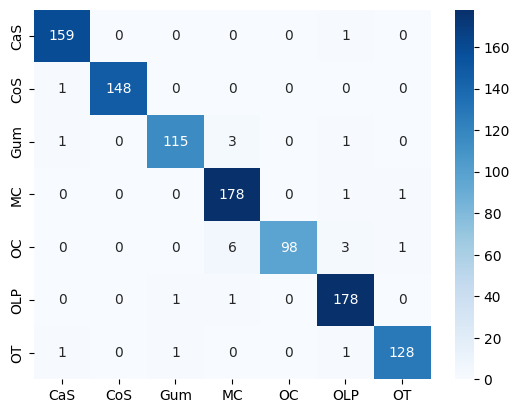

In [32]:
import seaborn as sns
class_names = ["CaS", "CoS", "Gum", "MC", "OC", "OLP", "OT"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
